In [1]:
%matplotlib inline
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns
analyzer = SentimentIntensityAnalyzer()

In [2]:
from twitterscraper import query_tweets
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [9]:
access_token = "1033758126699364353-x3BuGV7xyqRDzFGavUH6OeCj0WpsUS"
access_secret = "sZWdviYTFuVENnNvcWEyk2G34pEcMt8zdkvGhblQcLSl4"
consumer_key = "NJjaAZwo1ebDZWHTuYFv7PobW"
consumer_secret = "QHQUEYmDoiBMqk0PitkUl2BxbAKp2XEsrVpvKtmgEYr4ZlXkph"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [39]:
# Create a custom search term and define the number of tweets
search_term = "#big4agenda -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en").items(15000)


In [40]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [41]:
# Create a custom search term and define the number of tweets
search_term = "#big4agenda -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-12-13').items(10000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [42]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Data4SDGs Davis DavisAdieno giving a brief on the role of earth observation in addressing SDGs at the Kenyan Afr"))

In [58]:
# Create dataframe containing the polarity value and tweet text from the big 4 agenda
sentiment_df = pd.DataFrame(sentiment_values, columns=["Polarity", "Tweet"])

sentiment_df.head()

,Polarity,Tweet
0,0.000,Data4SDGs Davis DavisAdieno giving a brief on ...
1,0.000,Robb08962871 Here is what the Big4Agenda propo...
2,0.400,YesKilifi an environment that fosters dialogue...
3,0.025,Big4Agenda DEAR KENYANS THEIR IS NOTHING LIKE ...
4,0.000,SonkoHelpsTurkana Kenyan nightmares This peanu...


In [59]:
sentiment_df.columns

Index(['Polarity', 'Tweet'], dtype='object')

In [60]:
sentiment_df.head(10)

,Polarity,Tweet
0,0.000,Data4SDGs Davis DavisAdieno giving a brief on ...
1,0.000,Robb08962871 Here is what the Big4Agenda propo...
2,0.400,YesKilifi an environment that fosters dialogue...
3,0.025,Big4Agenda DEAR KENYANS THEIR IS NOTHING LIKE ...
4,0.000,SonkoHelpsTurkana Kenyan nightmares This peanu...
5,0.000,Below are the services we offer 1Course counse...
6,0.600,UKenyatta Lovely to see among schools represen...
7,0.000,The big4lies to assist in enriching the dynast...
8,0.200,Big4Agenda Is A corruption Agenda to embezzle ...
9,0.000,UKenyatta I think Big4Agenda is not achievable...


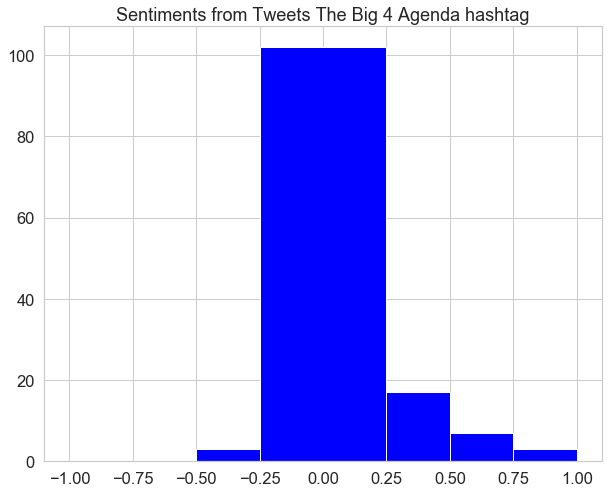

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets The Big 4 Agenda hashtag")
plt.show()

In [63]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]

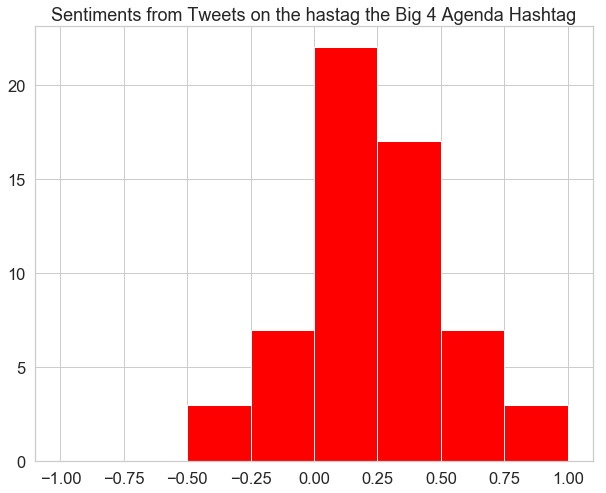

In [64]:

fig, ax = plt.subplots(figsize=(10, 8))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="red")

plt.title("Sentiments from Tweets on the hastag the Big 4 Agenda Hashtag")
plt.show()